In [53]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style


from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



In [54]:
train1 = pd.read_csv("./data/train_1.csv.zip", parse_dates=True)

## Hypothesis tests

In [55]:
name = []
for page in train1['Page']:
    split = page.split('.')
    name.append(split[-3])

train1['Name'] = name
train1['Language'] = train1['Name'].str[-2:]

In [56]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries, rolling_window, language):
    plt.figure(figsize=(50, 8))
    
    rolling_mean = pd.DataFrame.rolling(timeseries, window=rolling_window).mean()
    rolling_std = pd.DataFrame.rolling(timeseries, window=rolling_window).std()

    plt.plot(timeseries, color='blue', label= 'Original')
    plt.legend(loc='best')
    
    plt.plot(rolling_mean, color='red', label= 'Rolling Mean')
    plt.legend(loc='best')
    
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    
    plt.title(f'Rolling Mean & Standard Deviation by Language : {language}')
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    print()
    test = adfuller(timeseries, autolag='AIC')
    output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)
    print('-'*100)

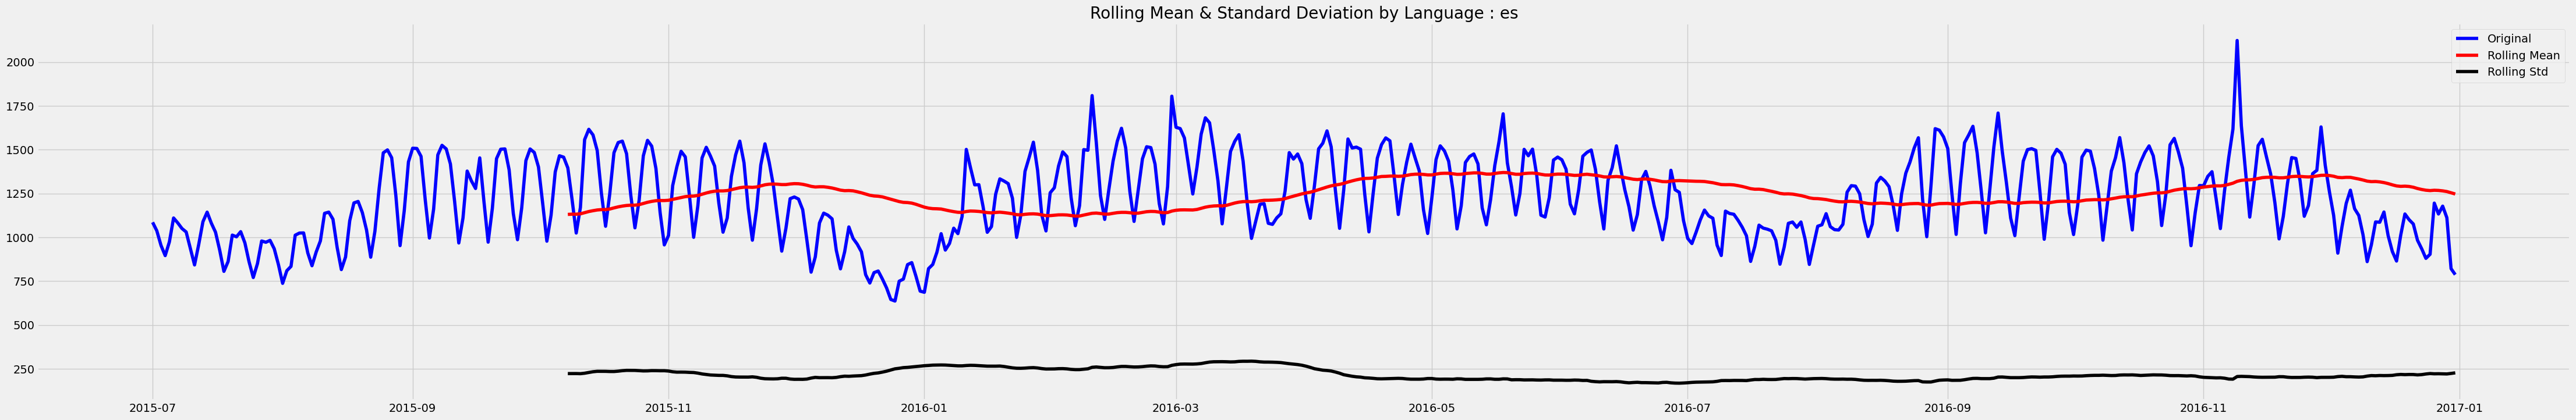

Results of Dickey-Fuller Test

Test Statistic                  -3.014209
p-value                          0.033589
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64
----------------------------------------------------------------------------------------------------


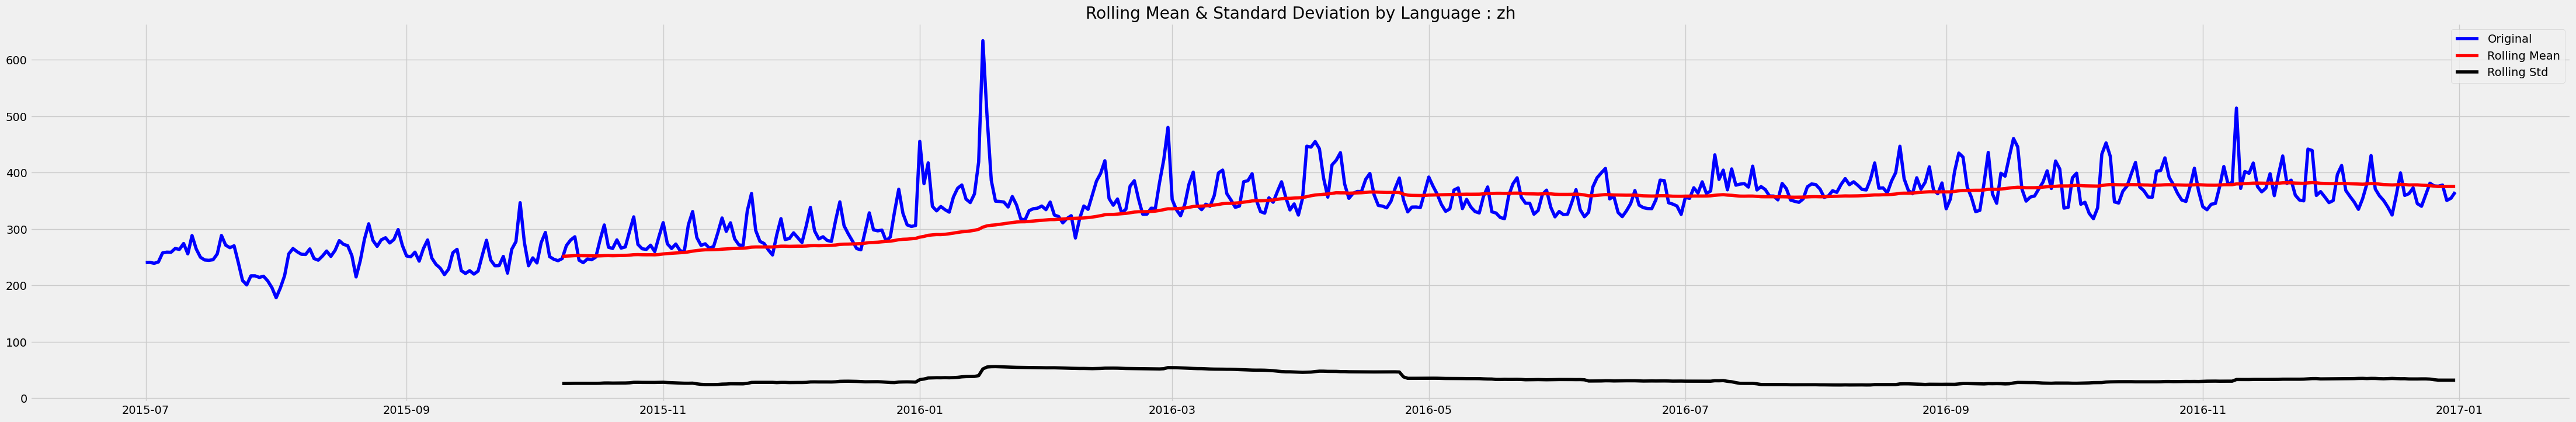

Results of Dickey-Fuller Test

Test Statistic                  -1.668433
p-value                          0.447446
#Lags Used                      19.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64
----------------------------------------------------------------------------------------------------


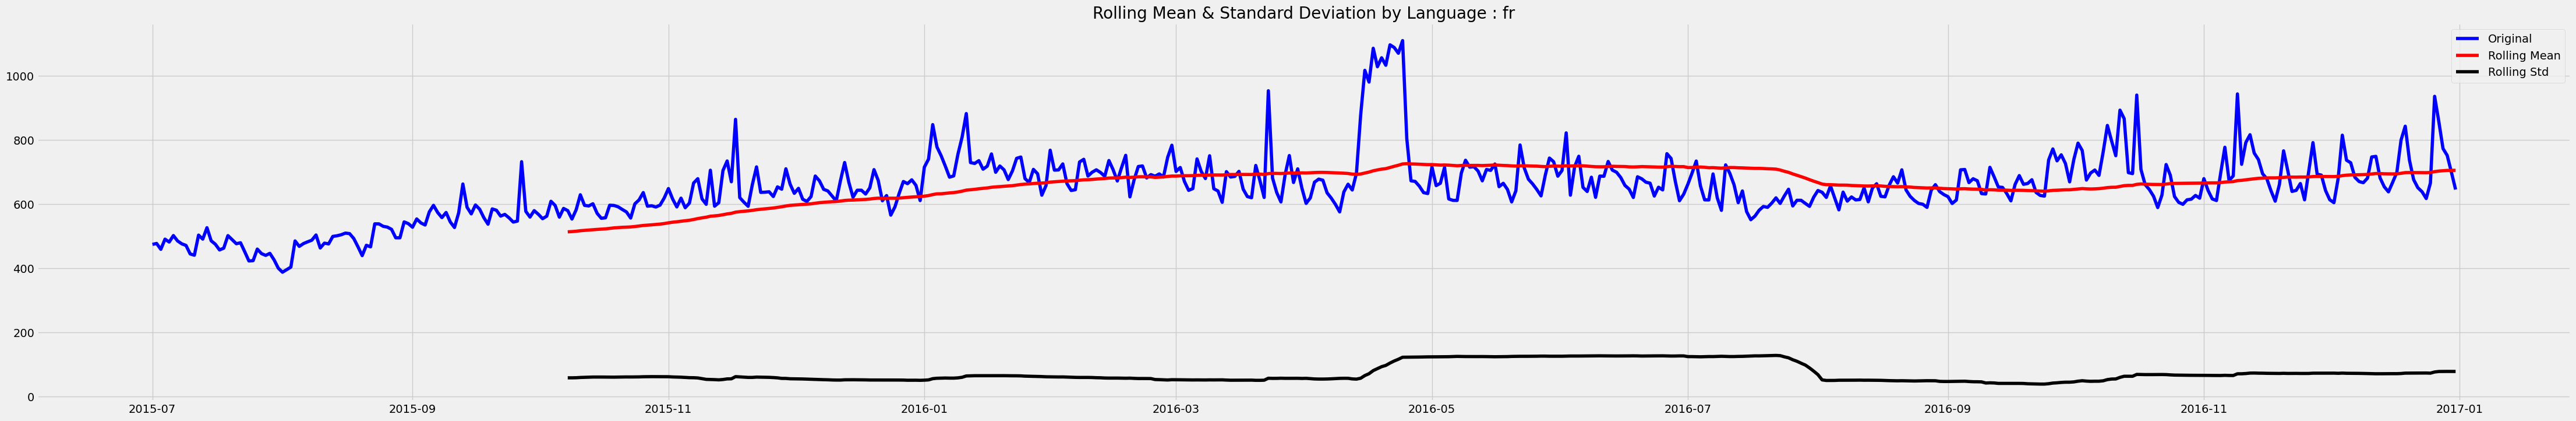

Results of Dickey-Fuller Test

Test Statistic                  -2.849875
p-value                          0.051495
#Lags Used                      13.000000
Number of Observations Used    536.000000
Critical Value (1%)             -3.442609
Critical Value (5%)             -2.866947
Critical Value (10%)            -2.569650
dtype: float64
----------------------------------------------------------------------------------------------------


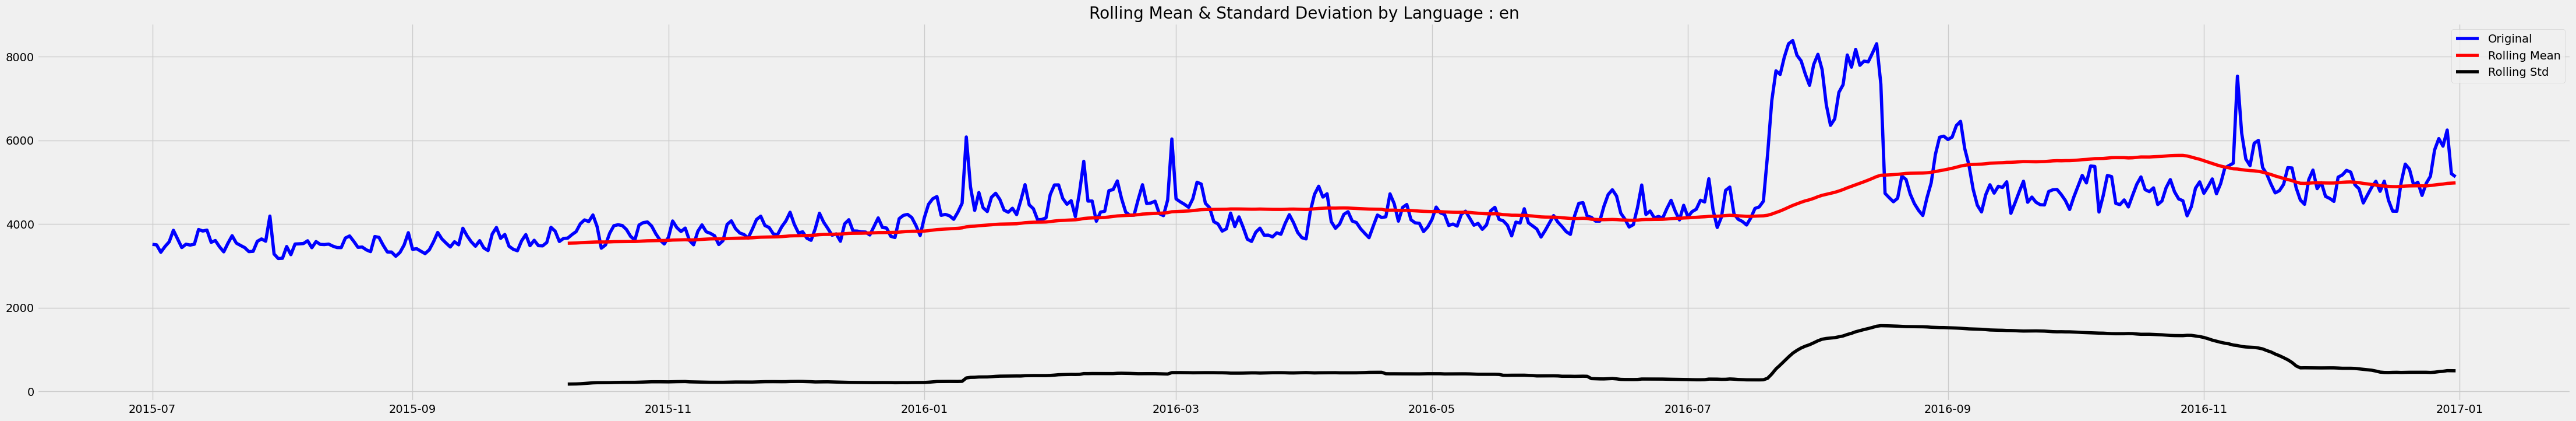

Results of Dickey-Fuller Test

Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64
----------------------------------------------------------------------------------------------------


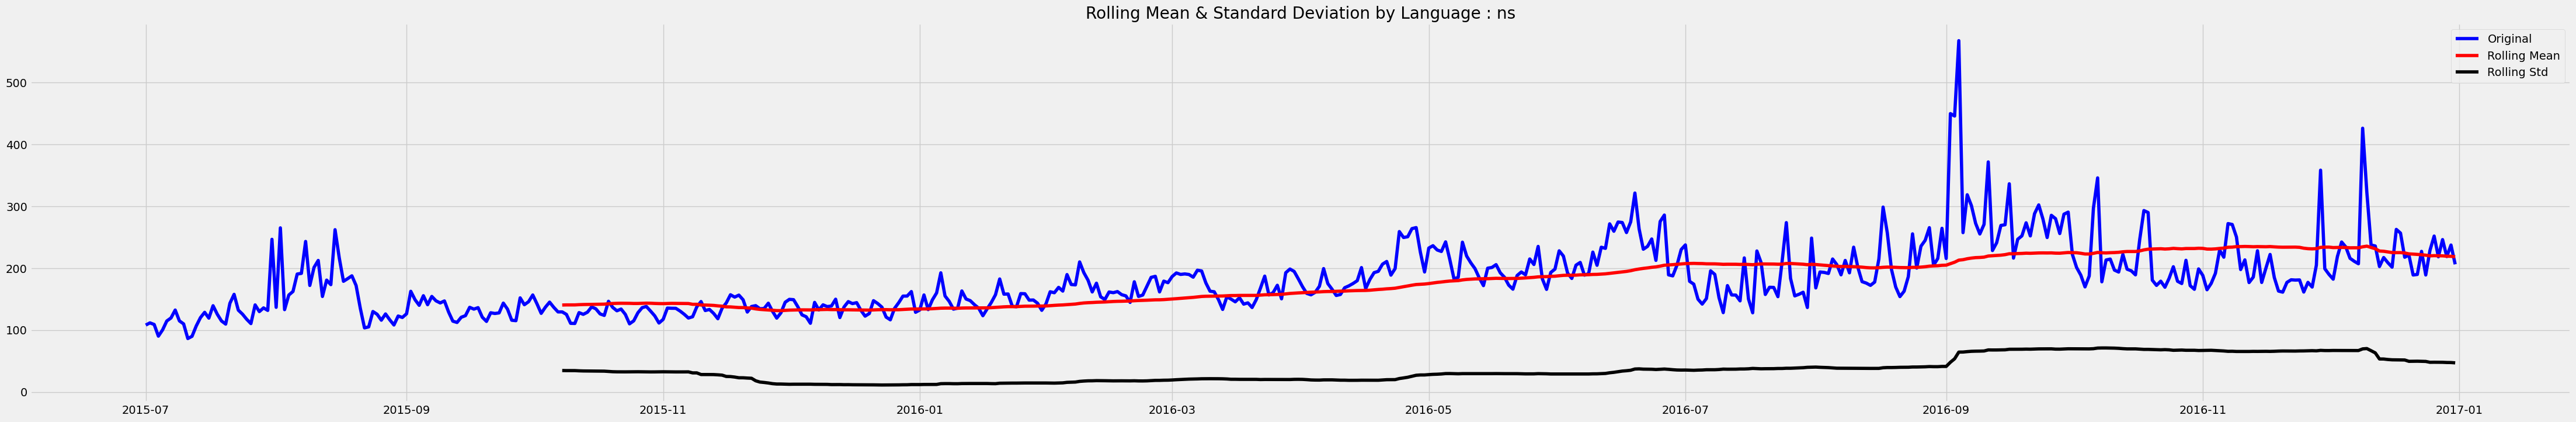

Results of Dickey-Fuller Test

Test Statistic                  -2.840219
p-value                          0.052754
#Lags Used                       6.000000
Number of Observations Used    543.000000
Critical Value (1%)             -3.442450
Critical Value (5%)             -2.866877
Critical Value (10%)            -2.569613
dtype: float64
----------------------------------------------------------------------------------------------------


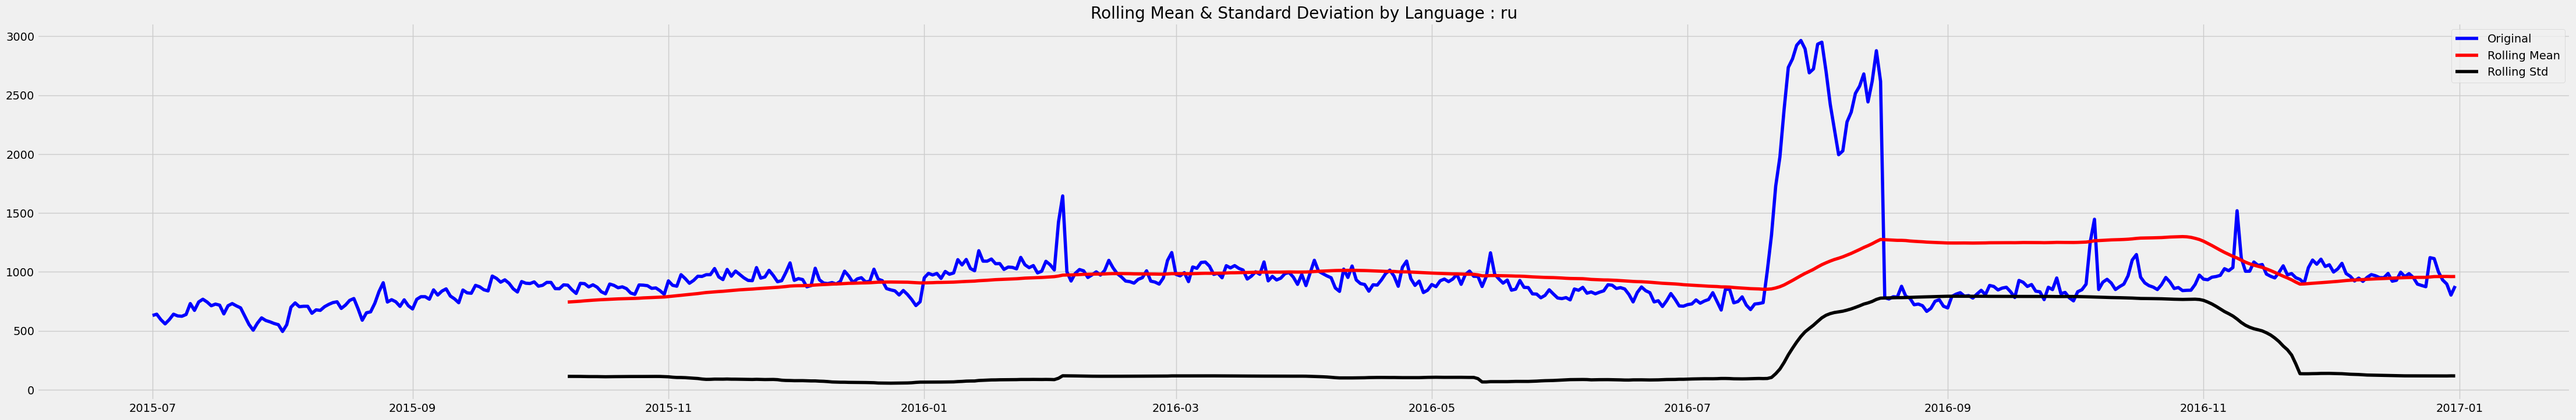

Results of Dickey-Fuller Test

Test Statistic                  -3.924031
p-value                          0.001865
#Lags Used                       3.000000
Number of Observations Used    546.000000
Critical Value (1%)             -3.442384
Critical Value (5%)             -2.866848
Critical Value (10%)            -2.569597
dtype: float64
----------------------------------------------------------------------------------------------------


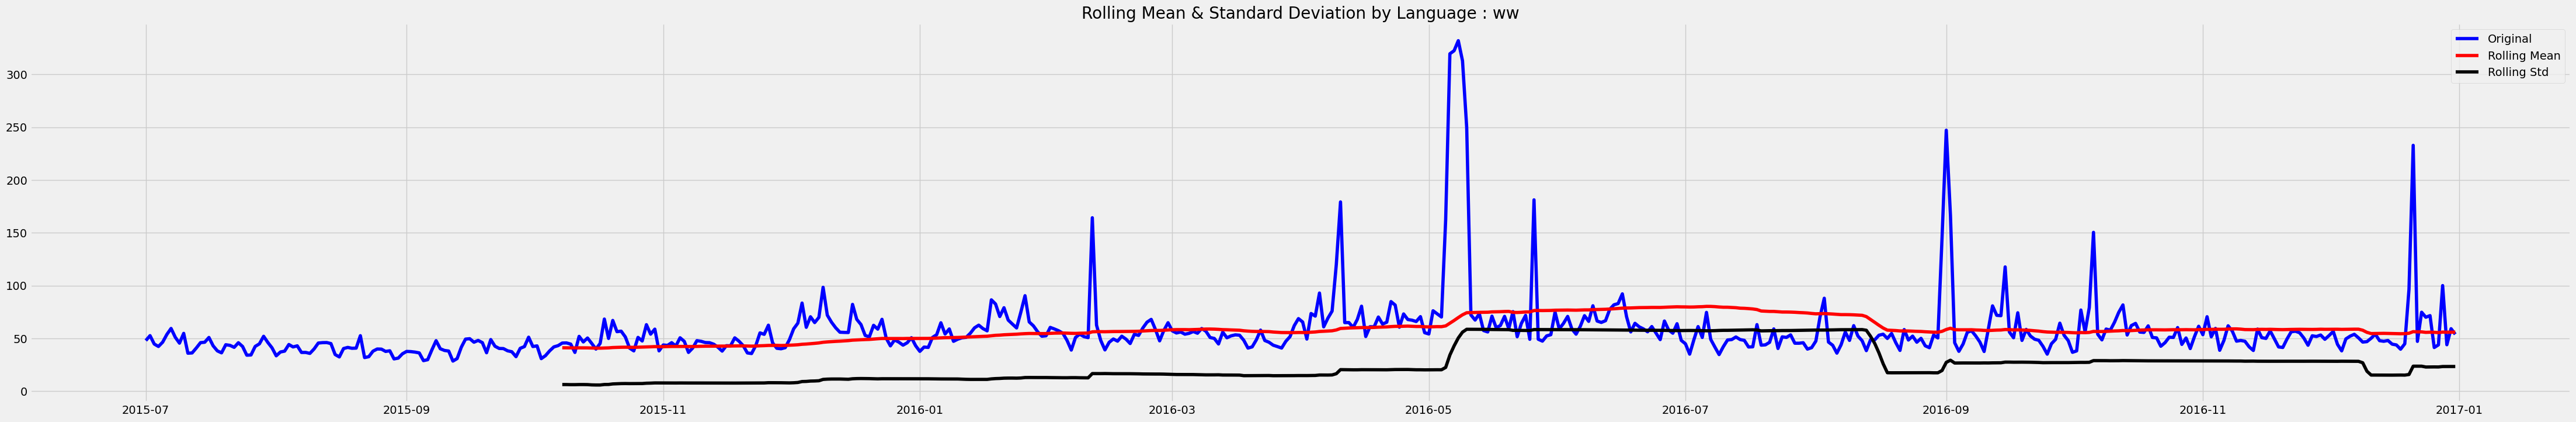

Results of Dickey-Fuller Test

Test Statistic                -6.338871e+00
p-value                        2.786556e-08
#Lags Used                     7.000000e+00
Number of Observations Used    5.420000e+02
Critical Value (1%)           -3.442473e+00
Critical Value (5%)           -2.866887e+00
Critical Value (10%)          -2.569618e+00
dtype: float64
----------------------------------------------------------------------------------------------------


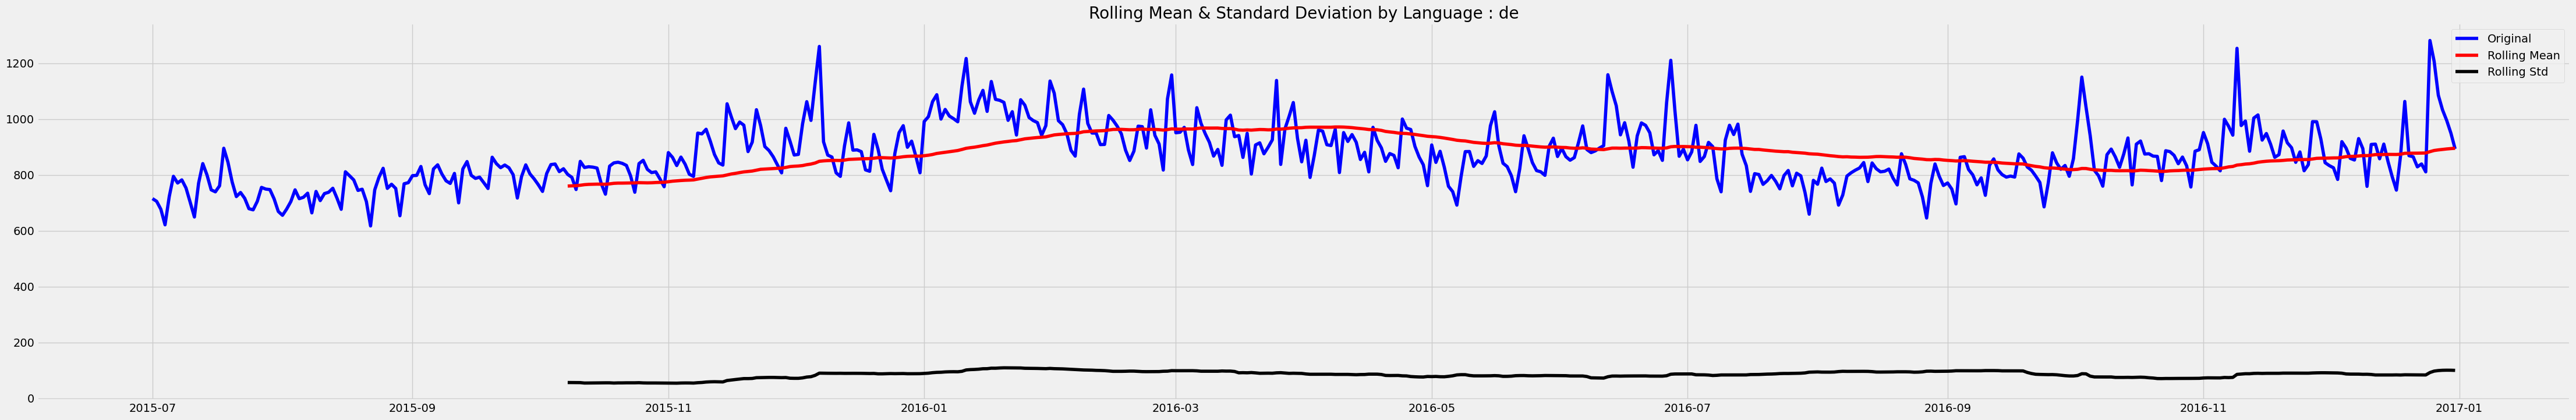

Results of Dickey-Fuller Test

Test Statistic                  -2.402707
p-value                          0.140974
#Lags Used                      16.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64
----------------------------------------------------------------------------------------------------


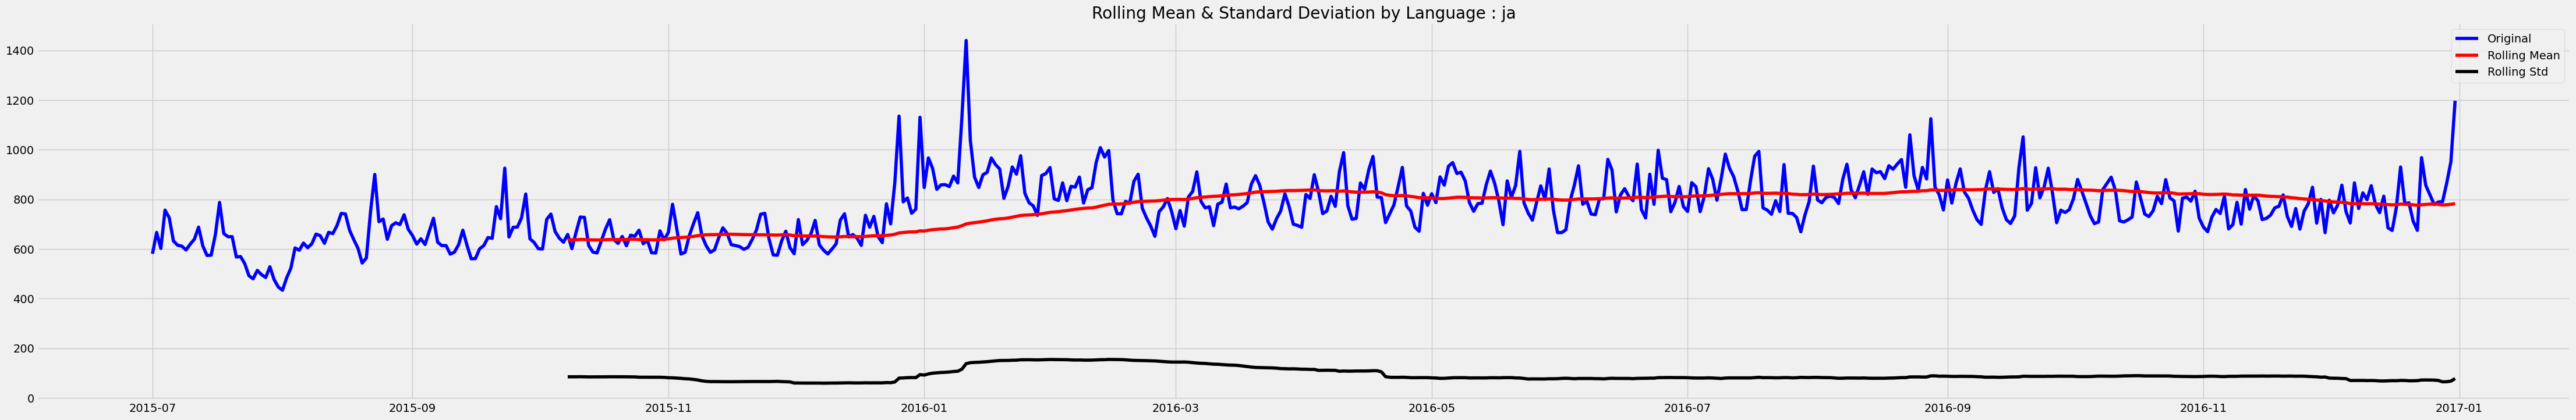

Results of Dickey-Fuller Test

Test Statistic                  -2.555394
p-value                          0.102571
#Lags Used                       8.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64
----------------------------------------------------------------------------------------------------


In [57]:
languages = ['es', 'zh', 'fr', 'en', 'ns', 'ru', 'ww', 'de', 'ja']

for lang in languages:
    
    df = train1[train1['Language'] == lang]
    
    remove_col = ['Language', 'Name']
    pv = df.drop(remove_col, axis=1)
    
    pivot = pv.melt(id_vars='Page', var_name='Date', value_name='Visits')
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    pivot.fillna(0, inplace=True)
    
    group_by = pivot[['Date', 'Visits', 'Page']].groupby(['Date'])['Visits'].mean()
    
    stationarity_test(group_by, rolling_window=100, language=lang)

In [58]:
pivot = train1.drop(['Name', 'Language'], axis=1)
train_pivot = pivot.melt(id_vars='Page', var_name='Date', value_name='Visits')

In [59]:
train_pivot.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [60]:
train_pivot.fillna(0, inplace=True)

In [61]:
train_pivot['Visits'] = train_pivot['Visits'].astype('float')

In [62]:
train_pivot

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


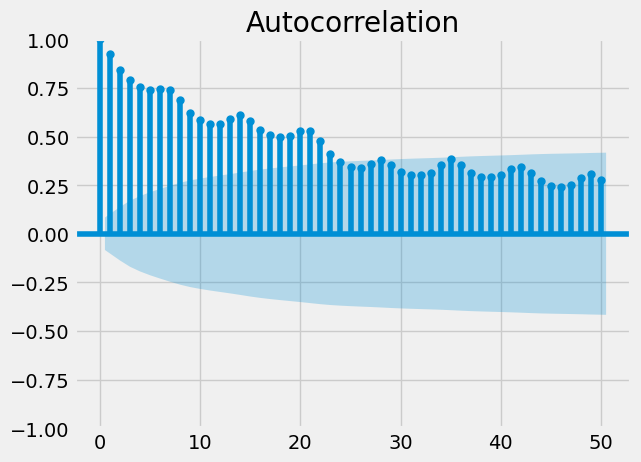

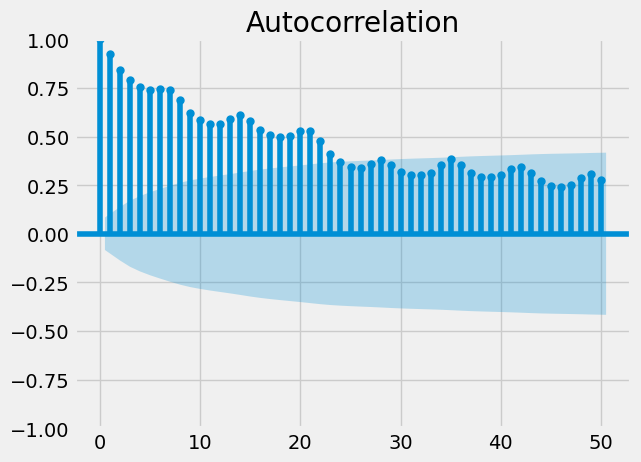

In [63]:
acf = train_pivot[['Date', 'Visits']].groupby(['Date'])['Visits'].mean()
plot_acf(acf, lags=50)

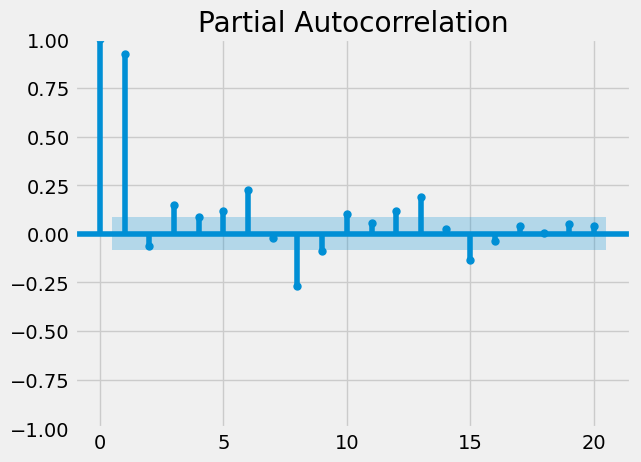

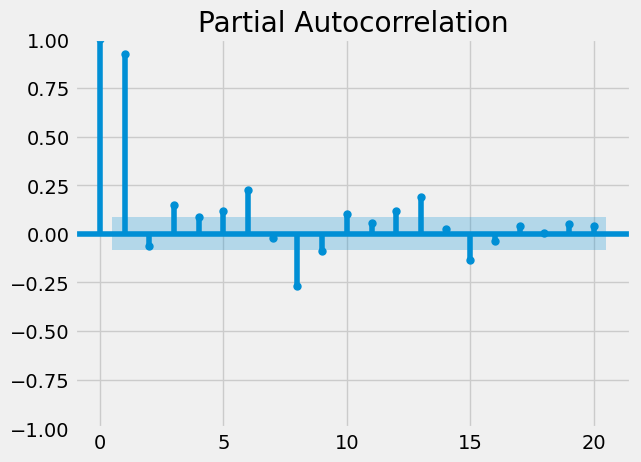

In [64]:
plot_pacf(acf, lags=20)

In [65]:
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100



In [66]:
def plot_predictions(actual, predicted, figsize, title):
    
    plt.figure(figsize=figsize)
    actual = plt.plot(actual, color='blue', label='Actual')
    predicted = plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

In [68]:
data = train1.drop(['Page', 'Name', 'Language'], axis=1)
data.fillna(0, inplace=True)

### AR Model

In [69]:
from sklearn.metrics import mean_squared_error
import math

def rmse(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [70]:
from statsmodels.tsa.ar_model import AutoReg

In [21]:
resultsofAR={'Site':[],'Error Values':[]}
resultsofAR = pd.DataFrame(resultsofAR)

In [22]:
def AutoRegression(data, lags, test_days):
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    
    train = scaled_data[:-test_days]
    test = scaled_data[-test_days:]
    
    ar = AutoReg(train, lags=lags)
    model = ar.fit()

    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end)
    
    
    test_start = len(train)
    test_end = len(train) + len(test)
    test_pred = model.predict(start=test_start, end=test_end)
    

    train_inverse = scaler.inverse_transform(train_pred.reshape(-1, 1))
    test_inverse = scaler.inverse_transform(test_pred.reshape(-1, 1))
    

    plot_predictions(data[:-test_days], train_inverse, figsize=(20, 6), title='Training Original Predictions')
    plot_predictions(data[-test_days:], test_inverse, figsize=(20, 6), title='Testing Original Predictions')
        
    
    test_error = smape(test, test_pred)
    
    print(f' Test Error: {test_error}')
    
    return model,test_error

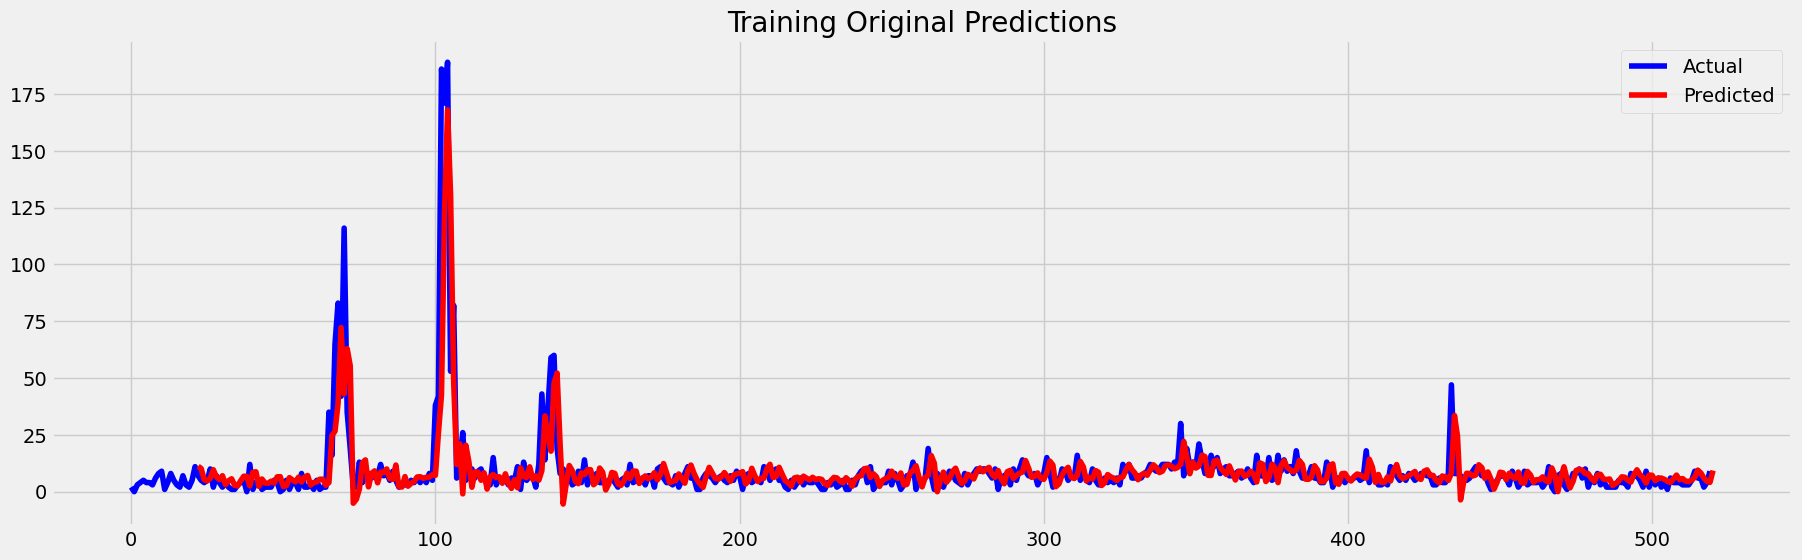

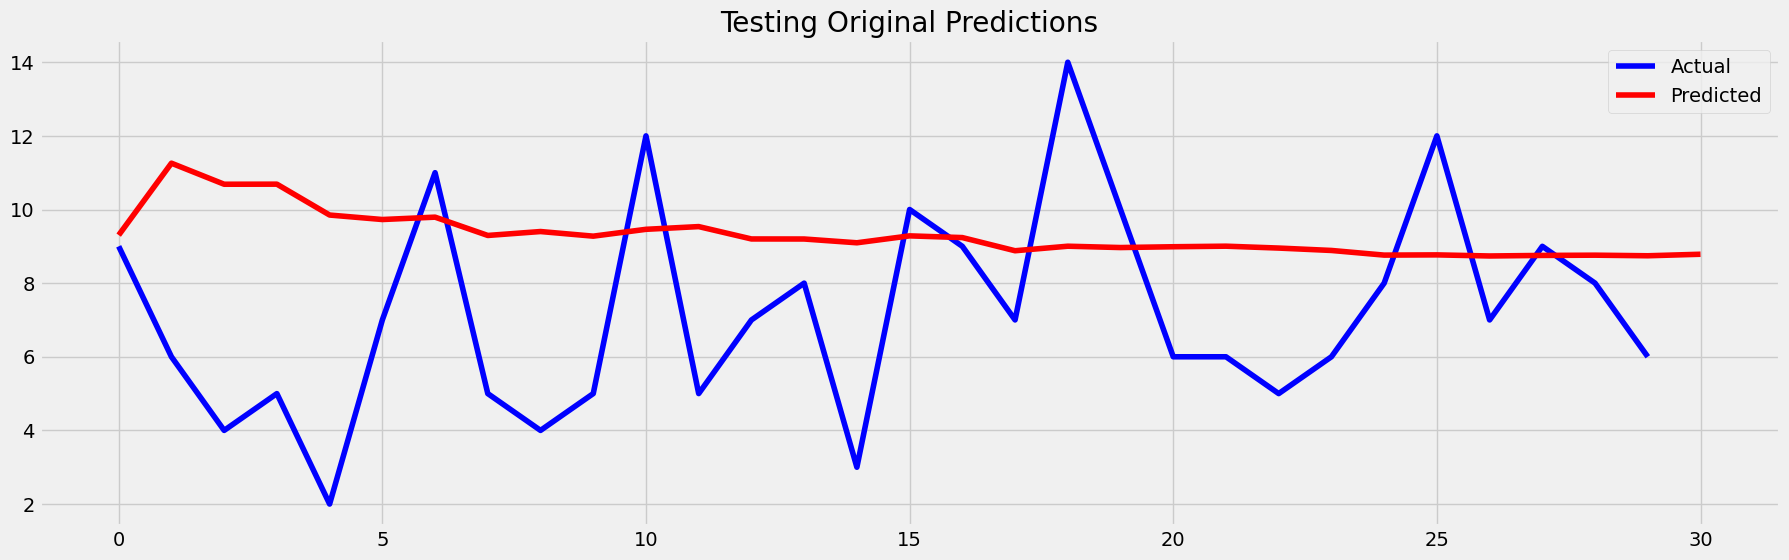

 Test Error: 40.029938213913745


In [23]:
train = data.iloc[1234, :].values
model,error = AutoRegression(train, 22, 30)
new_row = {'Site': train1.iloc[i,:].values[0], 'Error Values': error}

In [ ]:
for i in range(1000):
    train = data.iloc[i, :].values
    model,error = AutoRegression(train, 25, 30)
    new_row = {'Site': train1.iloc[i,:].values[0], 'Error Values': error}
    resultsofAR = resultsofAR.append(new_row, ignore_index=True)

In [ ]:
resultsofAR.to_csv('resultsofAR.csv')

### ARIMA

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
row = data.iloc[1234, :]

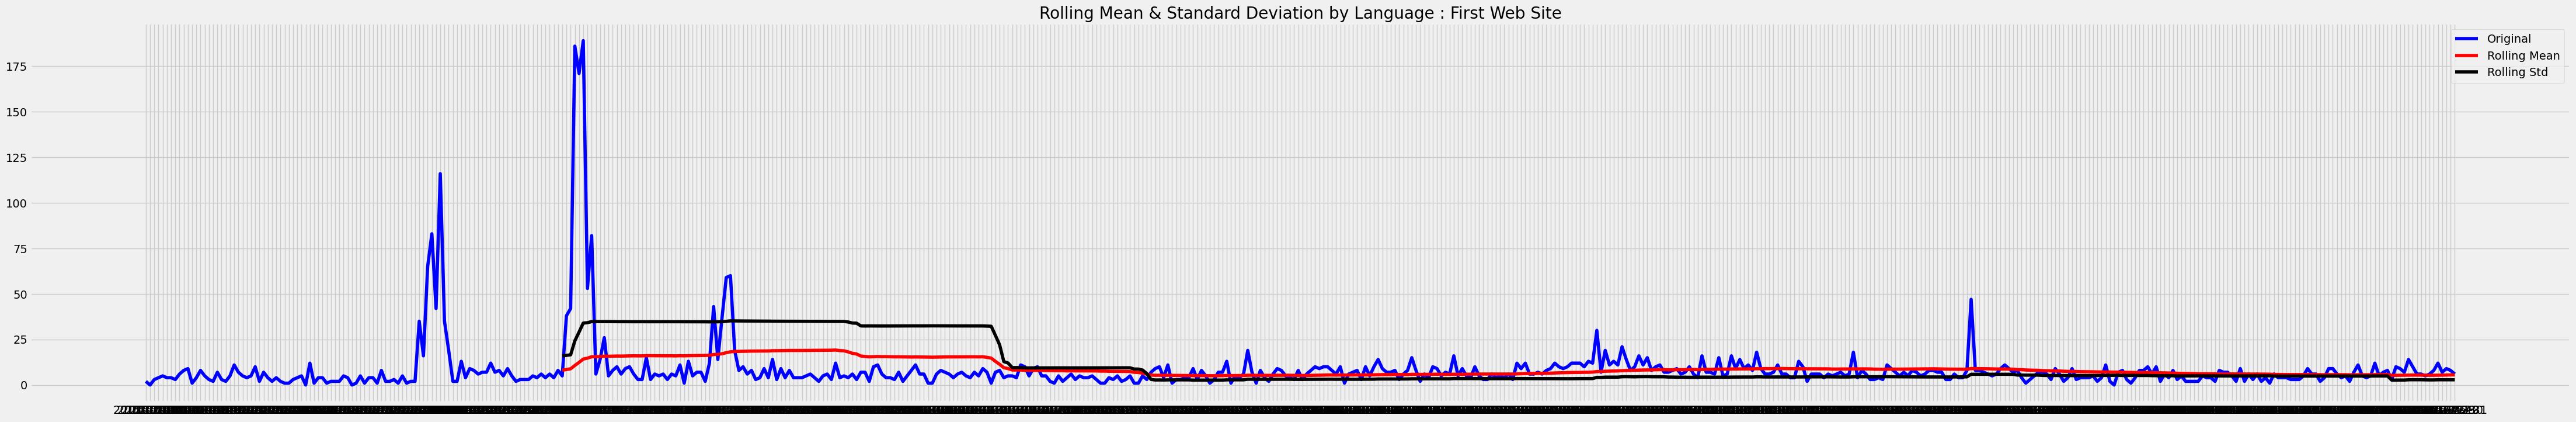

Results of Dickey-Fuller Test

Test Statistic                -9.528356e+00
p-value                        2.936080e-16
#Lags Used                     2.000000e+00
Number of Observations Used    5.470000e+02
Critical Value (1%)           -3.442361e+00
Critical Value (5%)           -2.866838e+00
Critical Value (10%)          -2.569592e+00
dtype: float64
----------------------------------------------------------------------------------------------------


In [45]:
stationarity_test(data.iloc[1234,:],100,'First Web Site')

In [85]:
def Arima(data, p, d, q, test_days):

    train_date = data[:-31]
    test_date = data[-31:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    train = scaled_data[:-31]
    test = scaled_data[-31:]

    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    test = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()

    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end, typ='levels')


    test_start = len(train)
    test_end = len(train) + len(test) - 1
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')


    train_inverse = scaler.inverse_transform(np.array(train_pred).reshape(-1, 1))
    test_inverse = scaler.inverse_transform(np.array(test_pred).reshape(-1, 1))

    
    plot_predictions(data[:-test_days].values, train_inverse, (20, 5), 'ARIMA Training Predictions')
    plot_predictions(data[-test_days:].values, test_inverse, (20, 5), 'ARIMA Testing Predictions')
    
    train_error = smape(train, train_pred[:-1])
    test_error = smape(test, test_pred)
    
    print(f' Test Error: {test_error}')
    
    
    return model,test_error

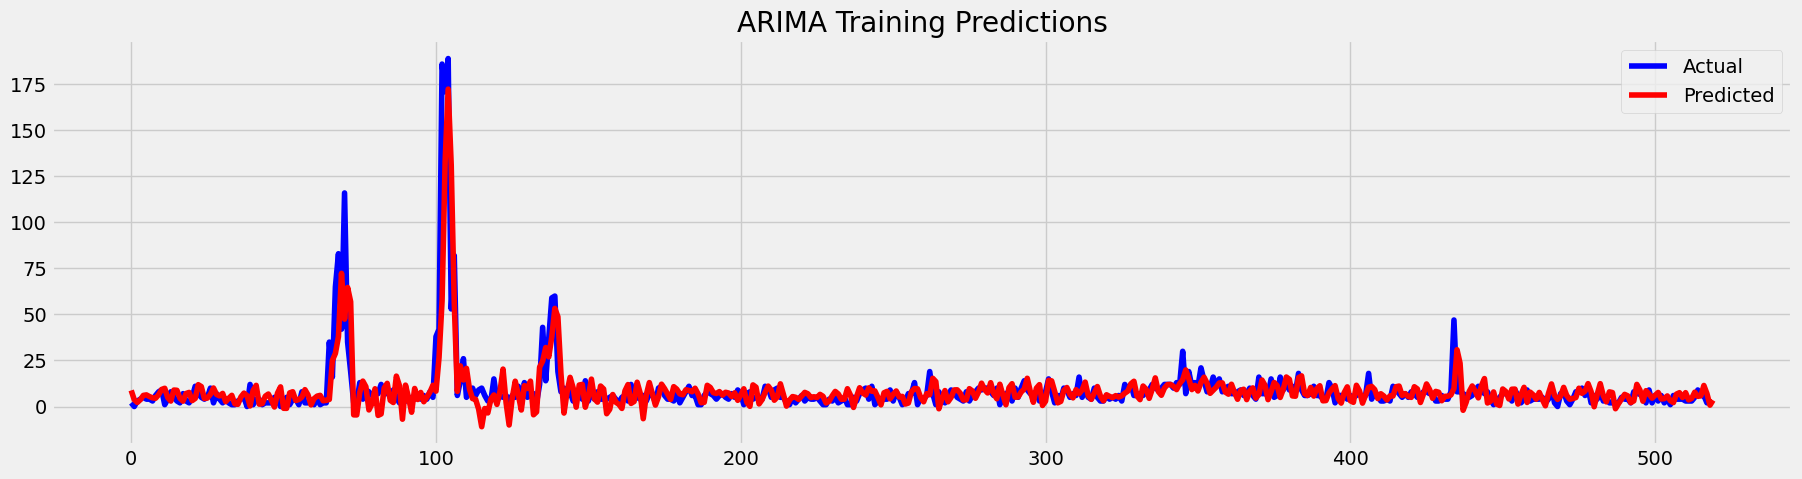

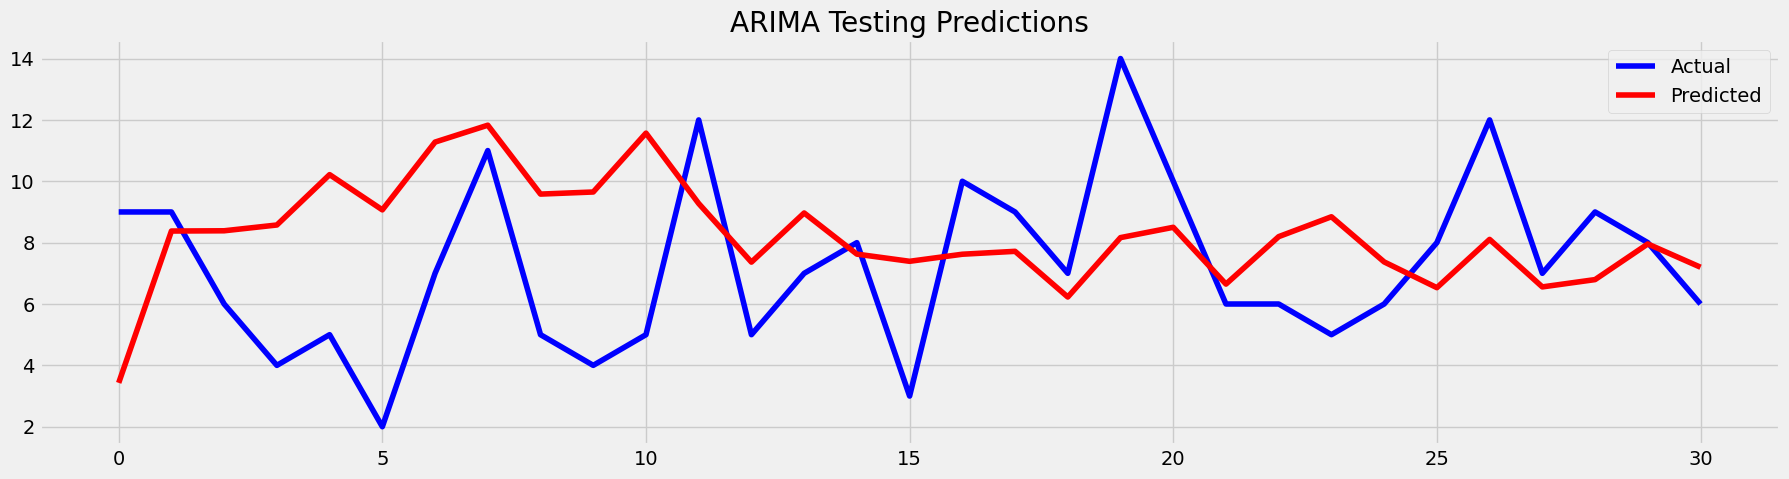

 Test Error: 38.96865735415791


In [86]:
model = Arima(row, 22, 0, 22, 31)

In [51]:
resultsofARIMA={'Site':[],'Error Values':[]}
resultsofARIMA = pd.DataFrame(resultsofARIMA)

In [ ]:
for i in range(1000):
    row = data.iloc[i, :]
    model,error = Arima(row, 22, 0, 22, 31)
    new_row = {'Site': train1.iloc[i,:].values[0], 'Error Values': error}
    resultsofARIMA = resultsofARIMA.append(new_row, ignore_index=True)

In [96]:
resultsofARIMA.to_csv('resultsofARIMA.csv')

### Prophet

In [71]:
from fbprophet import Prophet

In [1]:
import pandas as pd
resultsofProphet={'Site':[],'Error Values':[]}
resultsofProphet = pd.DataFrame(resultsofProphet)

In [91]:
def prophet(data, test_days, visualize_predictions, plot_prophet_comp:bool=False):
    
    train_date = data[:-test_days]
    test_date = data[-test_days:]
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    train = scaled_data[:-test_days]
    test = scaled_data[-test_days:]
    
    df = pd.DataFrame({'ds':pd.to_datetime(train_date.index), 'y':train.reshape(len(train))})
    
    model = Prophet()
    model.fit(df)
    
    future = model.make_future_dataframe(periods=test_days)
    forecast = model.predict(future)
    
    train_actual = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    train_pred = pd.Series(forecast.yhat.values[:-test_days].reshape(len(train)), index=pd.to_datetime(train_date.index))
    
    test_actual = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))
    test_pred = pd.Series(forecast.yhat.values[-test_days:].reshape(len(test)), index=pd.to_datetime(test_date.index))
    
    train_inverse = scaler.inverse_transform(np.array(train_pred).reshape(-1, 1))
    test_inverse = scaler.inverse_transform(np.array(test_pred).reshape(-1, 1))
    
    # Visualize Predictions
    if visualize_predictions:
        plot_predictions(data[:-test_days].values, train_inverse, title='Prophet Training Predictions', figsize=(20, 5))
        plot_predictions(data[-test_days:].values, test_inverse, title='Prophet Testing Predictions', figsize=(20, 5))
    
    if plot_prophet_comp:
        fig1 = model.plot(forecast)
        fig2 = model.plot_components(forecast)
    
    train_error = smape(train_actual, train_pred)
    test_error = smape(test_actual, test_pred)
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    

    
    
    return model,test_error

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.2333
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      62       1011.26   8.18969e-05       81.1709   9.782e-07       0.001      115  LS failed, Hessian reset 
      99       1011.27   1.10973e-07       77.9008      0.7651      0.7651      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       1011.27    1.9904e-08       79.2805      0.2318       0.697      167   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


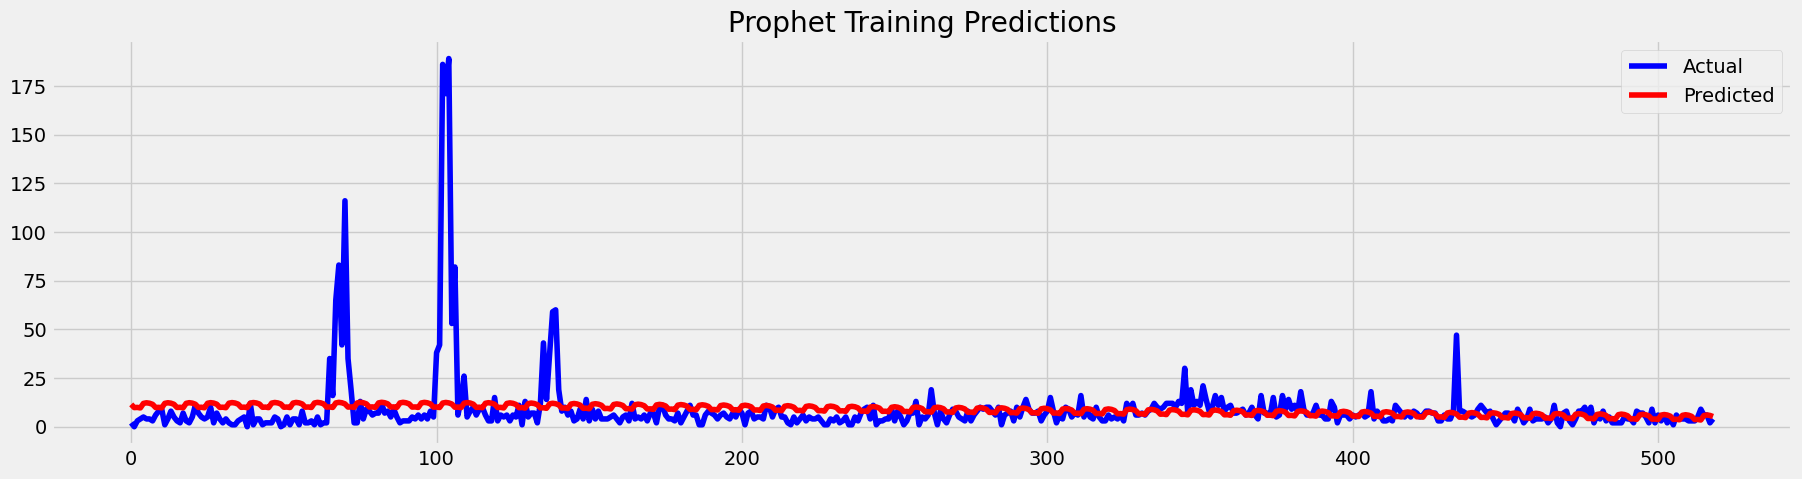

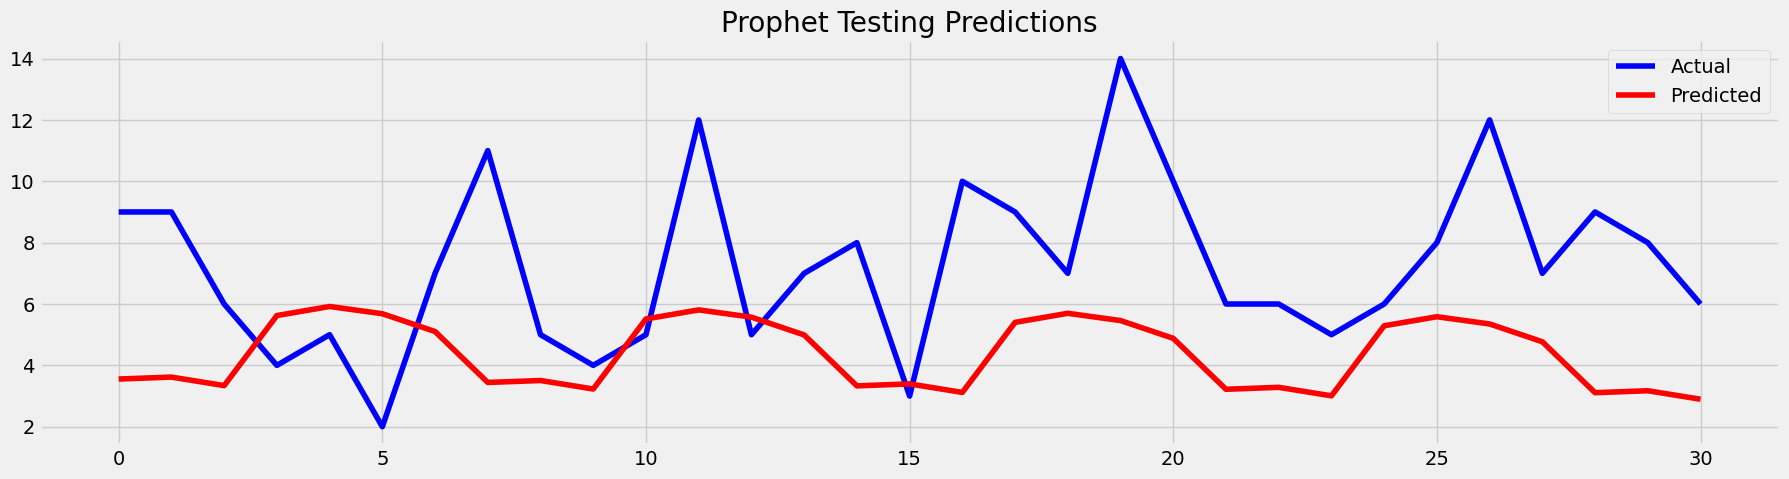

Train Error: 63.27528070387177 | Test Error: 54.93467086029503


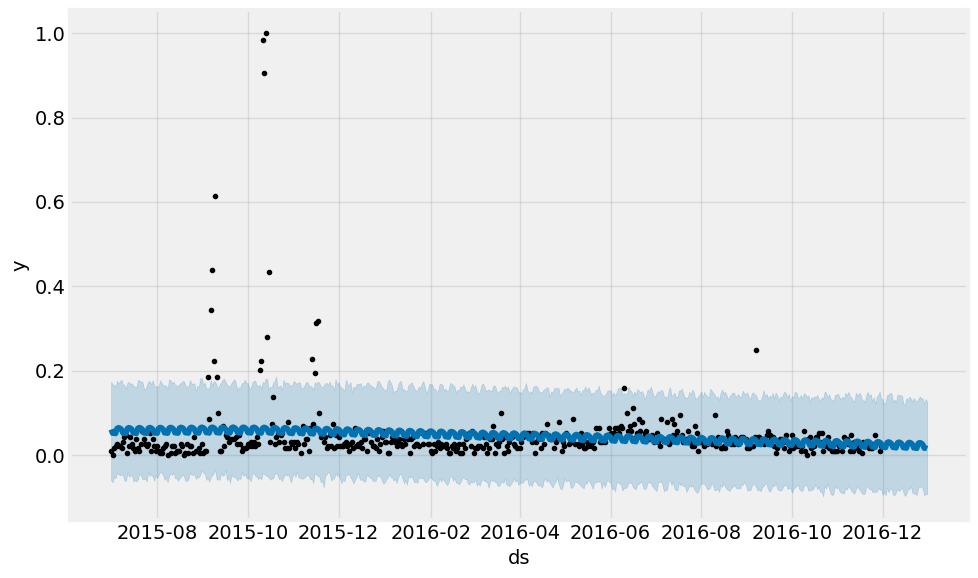

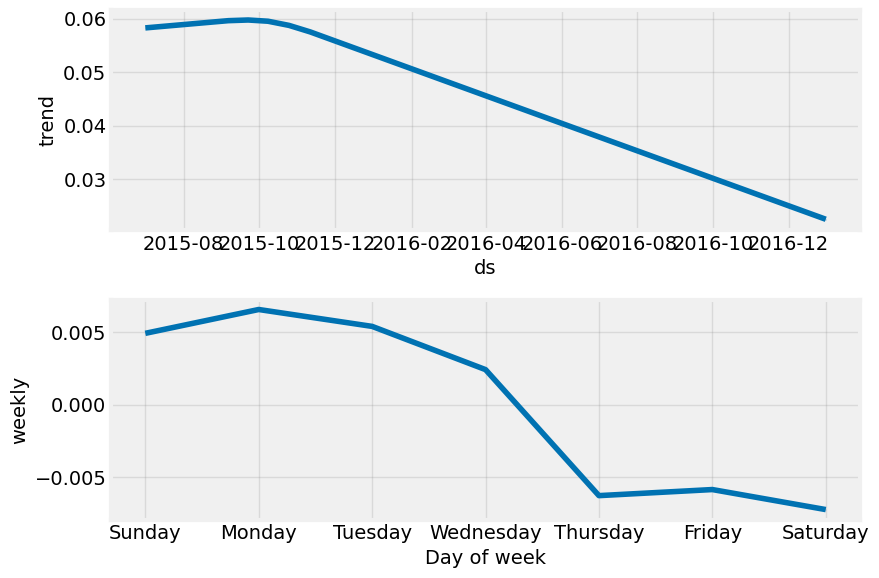

In [98]:
row_p = data.iloc[1234, :]
model_prophet = prophet(row_p, 31, True, True)

In [ ]:
for i in range(1000):
    row_p = data.iloc[1234, :]
    model_prophet,error = prophet(row_p, 31, True, True) 
    new_row={'Site':train1.iloc[i,:],'Error':error}
    resultsofProphet=resultsofProphet.append(new_row,ignore_index=True)

In [2]:
resultsofProphet.to_csv('resultsofProphet.csv')

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

In [ ]:
import pandas as pd
resultsofLSTM={'Site':[],'Error Values':[]}
resultsofLSTM = pd.DataFrame(resultsofLSTM)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
def run_lstm(data, num_lstm, epochs, visualize_predictions=False):
    for i in range(1000):
        row = data.iloc[i, :]
        scaler = MinMaxScaler()
        scaled_row = scaler.fit_transform(np.array(row).reshape(-1, 1))

        # split into training and testing
        train_data=scaled_row[:-59]
        test_data=scaled_row[-59:]

        # Transform the dataset
        x_train, y_train = create_dataset(train_data,30)
        x_test, y_test = create_dataset(test_data,30)

        # Reshape the data for the lstm model
        x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

        print(x_train.shape)
        print(y_train.shape)
        print(x_test.shape)
        print(y_test.shape)

        model = Sequential()
        model.add(LSTM(num_lstm, input_shape = (30,1)))
        # model.add(Dense(32))
        # model.add(Dense(16))
        # model.add(Dense(8))
        model.add(Dense(4))
        model.add(Dense(2))
        model.add(Dense(1))
        model.compile(loss = 'mae', optimizer = 'adam')

        model.summary()

        model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=15,verbose=1)

        # test the model
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        # print(train_pred)
        # print(test_pred)

        train_pred_inverse = scaler.inverse_transform(train_pred)
        test_pred_inverse = scaler.inverse_transform(test_pred)

        if visualize_predictions:
            plot_predictions(row[30:30+460].values, train_pred_inverse, figsize=(20, 5), title='LSTM Training Predictions')
            plot_predictions(row[460+30+30+2:550].values, test_pred_inverse, figsize=(20, 5), title='LSTM Testing Predictions')

        # Error
        train_error_mae = mean_absolute_error(y_train.reshape(-1, 1), train_pred)
        test_error_mae = mean_absolute_error(y_test.reshape(-1, 1), test_pred)

        train_error_mape = mean_absolute_percentage_error(y_train, train_pred)
        test_error_mape = mean_absolute_percentage_error(y_test, test_pred)

        train_error_smape = smape(y_train, train_pred)
        test_error_smape = smape(y_test, test_pred)

        new_row = pd.DataFrame({'Site': train1.iloc[i,:].values[0], 'Error Values': test_error_smape})
        resultsofLSTM = pd.concat([resultsofLSTM, new_row],ignore_index=True)

        resultsofLSTM.loc[len(resultsofLSTM.index)] = [train1.iloc[i,:].values[0], test_error_smape]

        print('Mean Absolute Error')
        print(f'Train Error: {train_error_mae} | Test Error: {test_error_mae}')
        print('-' * 100)
        print('MAPE')
        print(f'Train Error: {train_error_mape} | Test Error: {test_error_mape}')
        print('-' * 100)
        print('SMAPE')
        print(f'Train Error: {train_error_smape} | Test Error: {test_error_smape}')

        return model

In [ ]:
row = data.iloc[1234, :]
model_lstm = run_lstm(row, 50, 10, True)
resultsofLSTM.to_csv('resultsofLSTM.csv')

### XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def xgboost(data, estimators, visualize_predictions):
    
    # Split into training and testing
    train = data[:-31].values
    test = data[-31:].values
    
    x_train, y_train = create_dataset(train.reshape(-1, 1))
    x_test, y_test = create_dataset(test.reshape(-1, 1))
    
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_error = smape(y_train, train_pred)
    test_error = smape(y_test, test_pred)
    
    if visualize_predictions:
        plot_predictions(y_train, train_pred, figsize=(15, 4), title='Training Predictions')
        plot_predictions(y_test, test_pred, figsize=(15, 4), title='Testing Predictions')
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model,test_error

In [ ]:
data.iloc[124421,:]

In [ ]:
row_xg = data.iloc[1234, :]
model_xgb = xgboost(row_xg, 2000, True)

In [ ]:
resultsOfXG={'Site':[],'Error':[]}
resultsOfXG=pd.DataFrame(resultsOfXG)

In [ ]:
for i in range(1000):
    row_xg = data.iloc[i, :]
    model_xgb,error = xgboost(row_xg, 2000, False)  
    new_row={'Site':train1.iloc[i,:],'Error':error}
    resultsOfXG=resultsOfXG.append(new_row,ignore_index=True)

In [ ]:
resultsOfXG.to_csv('resultsXG.csv')